In [1]:
import pandas as pd
import pandas_profiling

In [2]:
df = pd.read_csv(r'C:/Users/pbann/Downloads/airfoil_self_noise.dat',delimiter='\t',names=['Frequency','Angle of attack','Chord length','Free-stream velocity','Suction side displacement thickness','Scaled sound pressure level'])

In [3]:
df.head()

,Frequency,Angle of attack,Chord length,Free-stream velocity,Suction side displacement thickness,Scaled sound pressure level
0,800,0.0,0.3048,71.3,0.002663,126.201
1,1000,0.0,0.3048,71.3,0.002663,125.201
2,1250,0.0,0.3048,71.3,0.002663,125.951
3,1600,0.0,0.3048,71.3,0.002663,127.591
4,2000,0.0,0.3048,71.3,0.002663,127.461


In [4]:
#df.columns=['Frequency','Angle of attack','Chord length','Free-stream velocity','Suction side displacement thickness','Scaled sound pressure level']

In [5]:
df.isnull().sum()

Frequency                              0
Angle of attack                        0
Chord length                           0
Free-stream velocity                   0
Suction side displacement thickness    0
Scaled sound pressure level            0
dtype: int64

In [6]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

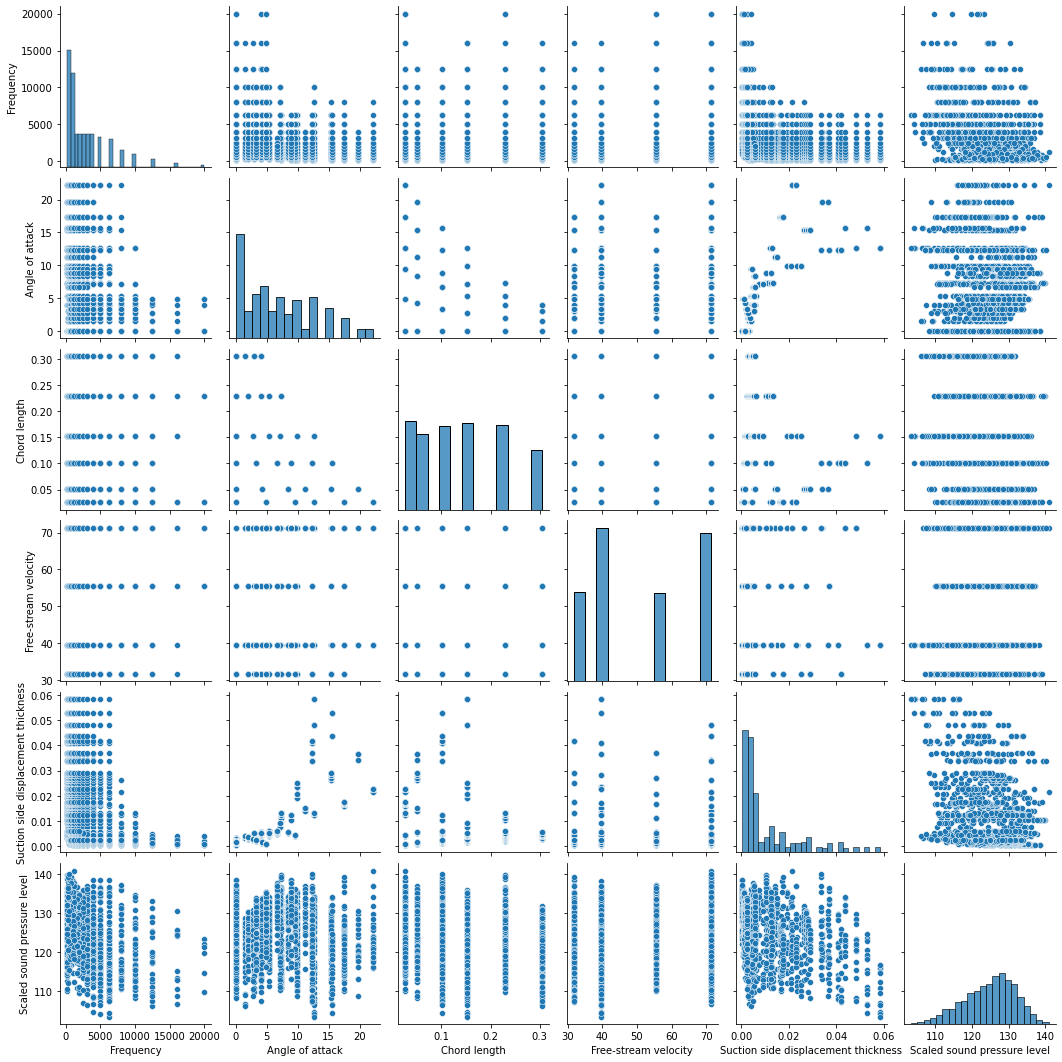

In [8]:
import seaborn as sns
sns.pairplot(df)

In [9]:
import matplotlib.pyplot as plt
X_train.corr()

,Frequency,Angle of attack,Chord length,Free-stream velocity,Suction side displacement thickness
Frequency,1.000000,-0.273327,-0.000324,0.125247,-0.239878
Angle of attack,-0.273327,1.000000,-0.498257,0.058603,0.762567
Chord length,-0.000324,-0.498257,1.000000,0.013061,-0.220849
Free-stream velocity,0.125247,0.058603,0.013061,1.000000,-0.000519
Suction side displacement thickness,-0.239878,0.762567,-0.220849,-0.000519,1.000000


C:\Users\pbann\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Frequency'>

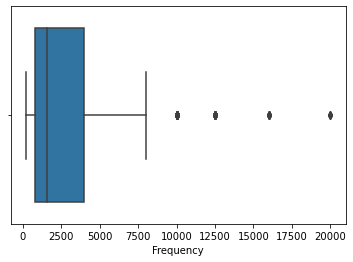

In [10]:
sns.boxplot(X_train['Frequency'])

C:\Users\pbann\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Frequency', ylabel='Scaled sound pressure level'>

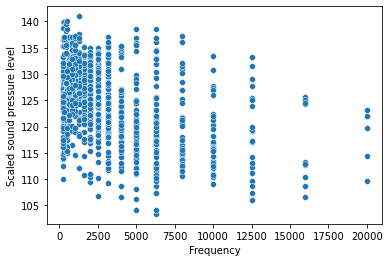

In [11]:
sns.scatterplot(X_train['Frequency'],y)
    

In [12]:
df['Scaled sound pressure level'].unique()

array([126.201, 125.201, 125.951, ..., 106.604, 106.224, 104.204])

C:\Users\pbann\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Scaled sound pressure level'>

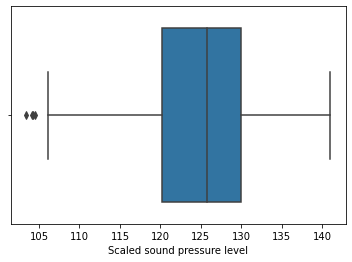

In [13]:
sns.boxplot(df['Scaled sound pressure level'])

In [14]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

In [33]:
import pickle
pickle.dump(regressor,open('model.pkl','wb'))

In [34]:
!pip install flask

In [35]:
pickled_model=pickle.load(open('model.pkl','rb'))
pickled_model.predict(X_test)

array([124.06768512, 119.59316737, 120.29933092, 129.61912851,
       129.81089779, 132.61068301, 122.44438053, 126.7461602 ,
       129.99906397, 125.94601069, 132.50626617, 113.78942913,
       130.10151743, 132.51123677, 123.6412694 , 114.10666435,
       124.31679905, 126.6766228 , 129.24252599, 131.79580713,
       125.77675782, 125.02970619, 116.44955941, 129.88018679,
       124.2232864 , 124.67967727, 131.60657138, 124.57186337,
       115.76458243, 123.39652912, 125.13674229, 123.92018299,
       125.4841971 , 118.61796101, 121.70395495, 130.95730463,
       131.39243856, 128.29169206, 121.31077749, 117.99901537,
       126.41139865, 128.86175217, 126.44075781, 123.46463781,
       123.08590861, 130.13707376, 125.11244177, 120.01115538,
       123.19344296, 132.81698484, 128.72414835, 117.7903339 ,
       123.4283675 , 122.57110308, 126.71758509, 120.44811529,
       123.29741941, 128.68403927, 124.25898336, 123.22309466,
       125.44226349, 131.08621938, 126.73671008, 131.37

In [32]:
pickled_model.predict([[2000,0.0,0.3048,71.3,0.002663]])

array([126.11545259])

In [19]:
from sklearn.model_selection import cross_val_score
import numpy as np
mse=cross_val_score(regressor,X,y,scoring='neg_mean_squared_error',cv=5)
mean_mse=np.mean(mse)
print(mean_mse)

-27.188623343053365


In [20]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

ridge=Ridge()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100]}
ridge_regressor=GridSearchCV(ridge,parameters,scoring='neg_mean_squared_error',cv=5)
ridge_regressor.fit(X,y)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40, 45, 50, 55, 100]},
             scoring='neg_mean_squared_error')

In [21]:
print(ridge_regressor.best_params_)
print(ridge_regressor.best_score_)

{'alpha': 0.01}
-27.139316557424138


In [22]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
lasso=Lasso()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100]}
lasso_regressor=GridSearchCV(lasso,parameters,scoring='neg_mean_squared_error',cv=5)

lasso_regressor.fit(X,y)
print(lasso_regressor.best_params_)
print(lasso_regressor.best_score_)

C:\Users\pbann\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14157.805664499963, tolerance: 5.837267824214975
  model = cd_fast.enet_coordinate_descent(
C:\Users\pbann\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 13868.919541343592, tolerance: 5.453631819615308
  model = cd_fast.enet_coordinate_descent(
C:\Users\pbann\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 13546.846389225922, tolerance: 5.4214056751073985
  model = cd_fast.enet_coordinate_descent(


{'alpha': 1e-08}
-27.18862317237341


In [23]:
prediction_lasso=lasso_regressor.predict(X_test)
prediction_ridge=ridge_regressor.predict(X_test)

In [24]:
from sklearn.metrics import r2_score

In [25]:
r2_score(y_test,prediction_lasso)

0.5174349435833293

In [26]:
r2_score(y_test,prediction_ridge)

0.517353437657469

In [27]:
from sklearn.svm import SVR
classifier=SVC(kernel="rbf")
classifier.fit(X_train,y_train)

NameError: name 'SVC' is not defined

In [ ]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion='entropy')
classifier.fit(df.iloc[:,:-1],df.iloc[:,-1])

In [ ]:
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(classifier,filled=True)

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor

regressor = DecisionTreeRegressor(random_state=0)
mse=cross_val_score(regressor, X, y, cv=10)
mean_mse=np.mean(mse)
print(mean_mse)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
X, y = make_regression(n_features=5, n_informative=2,random_state=0, shuffle=False)
regr = RandomForestRegressor(max_depth=2, random_state=0)
regr.fit(X, y)
RandomForestRegressor()
print(regr.predict(((X_test)))
